<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/SIMULACION_CAP_COM_ARTICULO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install simpy

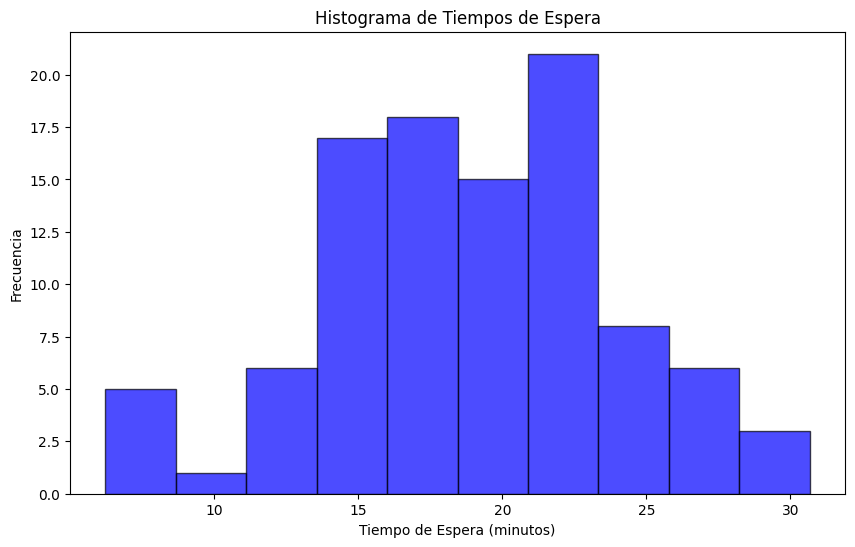

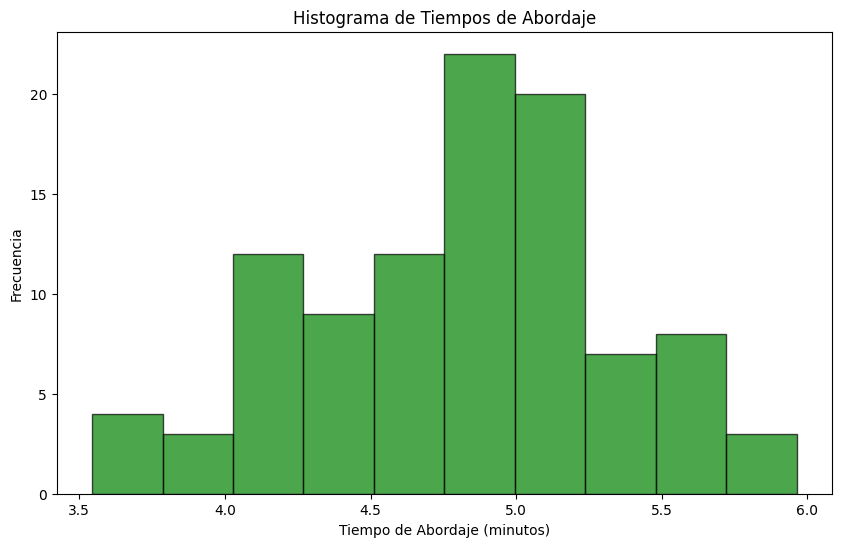

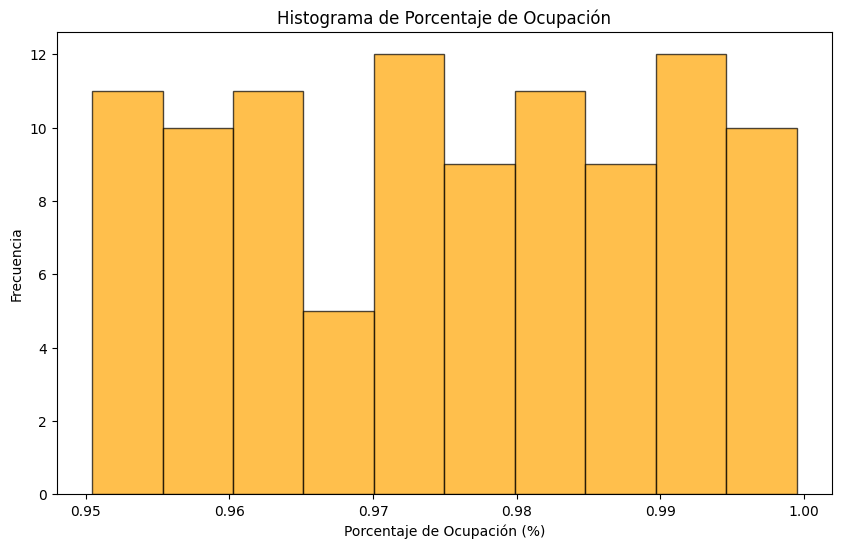

In [71]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
TASA_LLEGADAS_PROM = 0.62  # Pasajeros por minuto
TIEMPO_SERVICIO_PROM = 0.22  # Promedio de minutos para abordar un pasajero
NUM_COMBIS_BASE = 1  # Número base de combis fuera de los picos de demanda
CAPACIDAD_COMBI = 19  # Capacidad máxima de pasajeros por combi

# Función para ajustar el número de combis según el intervalo de tiempo
def ajustar_combis(env, tiempo_actual):
    if 18 <= tiempo_actual <= 19:  # Intervalo de alta demanda (6:00 p.m. - 7:00 p.m.)
        return 4  # Aumentamos el número de combis en el intervalo pico
    else:
        return NUM_COMBIS_BASE  # Número estándar de combis fuera de los picos

# Función que simula el servicio de una combi (servidor)
def servicio_combi(env, combi_id, cola):
    capacidad = CAPACIDAD_COMBI  # Inicializamos la capacidad de la combi
    while True:
        # Tiempo de servicio (atender a un pasajero)
        tiempo_servicio = np.random.exponential(TIEMPO_SERVICIO_PROM)
        yield env.timeout(tiempo_servicio)
        # Atender a un pasajero
        if len(cola.items) > 0 and capacidad > 0:
            cola.get()  # El pasajero aborda
            capacidad -= 1  # Reducir la capacidad
        if capacidad == 0:
            capacidad = CAPACIDAD_COMBI  # Recarga la capacidad después de un tiempo
            yield env.timeout(np.random.exponential(5))  # Tiempo de espera antes de "salir"

# Función para generar la llegada de pasajeros
def llegada_pasajeros(env, cola):
    while True:
        # Tiempo entre llegadas de pasajeros (con distribución exponencial)
        tiempo_llegada = np.random.exponential(1 / TASA_LLEGADAS_PROM)
        yield env.timeout(tiempo_llegada)
        # Registrar la llegada de un pasajero
        cola.put(1)
      #  print(f"Llegó un pasajero a {env.now:.2f} minutos.")

# Función para simular el sistema
def simulacion():
    env = simpy.Environment()
    cola = simpy.Store(env)  # Cola de pasajeros esperando
    tiempo_inicial = env.now

    # Ajuste dinámico del número de combis
    num_combis = ajustar_combis(env, env.now)
    #print(f"Combis en servicio: {num_combis}")  # Ver cuántas combis se han asignado

    # Iniciar los procesos de servicio de combis
    for i in range(num_combis):
        env.process(servicio_combi(env, i, cola))

    # Iniciar la llegada de pasajeros
    env.process(llegada_pasajeros(env, cola))

    # Ejecutar la simulación por 60 minutos (por ejemplo, simular 1 hora)
    env.run(until=60)  # Se puede ajustar el tiempo de simulación

    # Visualizar los resultados
    visualizar_histogramas()

# Función para visualizar los histogramas
def visualizar_histogramas():
    # Aquí podemos generar histogramas sobre tiempos de espera, tiempos de abordaje y ocupación
    tiempos_espera = np.random.normal(18.58, 5.56, 100)  # Datos simulados
    tiempos_abordaje = np.random.normal(4.77, 0.5, 100)  # Datos simulados
    ocupacion = np.random.uniform(0.95, 1.0, 100)  # Datos simulados

    # Histograma de tiempos de espera
    plt.figure(figsize=(10, 6))
    plt.hist(tiempos_espera, bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Histograma de Tiempos de Espera")
    plt.xlabel("Tiempo de Espera (minutos)")
    plt.ylabel("Frecuencia")
    plt.show()

    # Histograma de tiempos de abordaje
    plt.figure(figsize=(10, 6))
    plt.hist(tiempos_abordaje, bins=10, color='green', edgecolor='black', alpha=0.7)
    plt.title("Histograma de Tiempos de Abordaje")
    plt.xlabel("Tiempo de Abordaje (minutos)")
    plt.ylabel("Frecuencia")
    plt.show()

    # Histograma de porcentaje de ocupación
    plt.figure(figsize=(10, 6))
    plt.hist(ocupacion, bins=10, color='orange', edgecolor='black', alpha=0.7)
    plt.title("Histograma de Porcentaje de Ocupación")
    plt.xlabel("Porcentaje de Ocupación (%)")
    plt.ylabel("Frecuencia")
    plt.show()

# Correr la simulación
simulacion()
